In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
principal = 100

In [3]:
libor_rate = pd.DataFrame({"Time (in months)":[1,3,6],
                           "Time (in years)":[1/12,3/12,6/12],
                           "Rate (in %)":[0.0543857,0.0565863,0.0589683],
                           "Present Value":[0 for i in range(3)],
                           "Modified Duration":[0 for i in range(3)],
                           "DV01":[0 for i in range(3)]})
libor_rate.head(5)

,Time (in months),Time (in years),Rate (in %),Present Value,Modified Duration,DV01
0,1,0.083333,0.054386,0,0,0
1,3,0.250000,0.056586,0,0,0
2,6,0.500000,0.058968,0,0,0


In [4]:
def dv01(present_value,modified_duration):
    return present_value*modified_duration/10000

def modified_duration(maturity,Rate):
    return maturity/(1+Rate)

def present_value(face_value,maturity,Rate):
    return face_value*np.exp(-Rate*maturity)

In [5]:
for i in range(3):
    libor_rate["Modified Duration"][i] = modified_duration(libor_rate["Time (in years)"][i],libor_rate["Rate (in %)"][i])
    libor_rate["DV01"][i] = dv01(present_value(principal,libor_rate["Time (in years)"][i],libor_rate["Rate (in %)"][i]),modified_duration(libor_rate["Time (in years)"][i],libor_rate["Rate (in %)"][i]))
    libor_rate["Present Value"][i] = present_value(principal,libor_rate["Time (in years)"][i],libor_rate["Rate (in %)"][i])
    libor_rate["Modified Duration"][i] = modified_duration(libor_rate["Time (in years)"][i],libor_rate["Rate (in %)"][i])

In [6]:
libor_rate.head()

,Time (in months),Time (in years),Rate (in %),Present Value,Modified Duration,DV01
0,1,0.083333,0.054386,99.547811,0.079035,0.000787
1,3,0.250000,0.056586,98.595302,0.236611,0.002333
2,6,0.500000,0.058968,97.094627,0.472158,0.004584


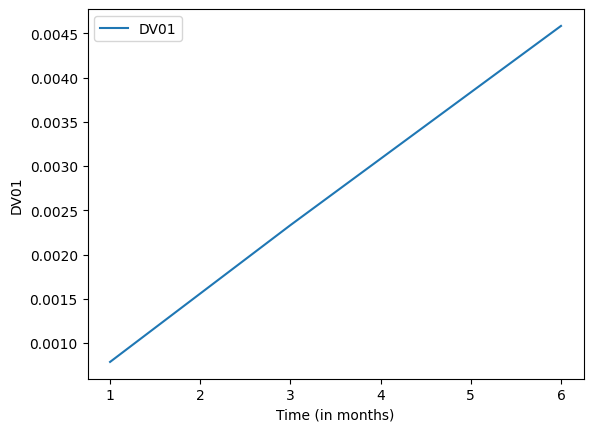

In [7]:
# Plot the second line
plt.plot(libor_rate["Time (in months)"],libor_rate["DV01"], label='DV01')

#plt.plot(libor_rate["Rate (in %)"],libor_rate["Time (in months)"], label='Rate(in%)')

# Add labels and a legend
plt.ylabel('DV01')
plt.xlabel('Time (in months)')
plt.legend()

# Show the plot
plt.show()
